In [ ]:
# --- Core Python ---
import re
import math
from collections import Counter
from urllib.parse import unquote, urlparse

# --- Data manipulation ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# --- Scikit-learn tools ---
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
import os

# --- Unmount any existing Drive mount (if needed) ---
drive.flush_and_unmount()

# --- (Optional) Clear local /content/drive mountpoint (disabled for safety) ---
drive_path = '/content/drive'
if os.path.exists(drive_path) and os.listdir(drive_path):
    print("Notice: /content/drive is not empty. Skipping automatic deletion for safety.")
    # Uncomment below to forcibly clear the mountpoint (NOT your actual Drive!)
    # !rm -rf /content/drive/*

# --- Mount Google Drive ---
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# Importing dataframe after being flattened
data_viz = pd.read_csv('/content/drive/MyDrive/BINOME_WORK/STAGE_CERIST/DATA_FORMATING/STEP4_COMBINED_CSV/combined_all_shuffled.csv')

In [ ]:
data_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   attack_tag                 1216 non-null   object 
 1   dst_ip                     1216 non-null   object 
 2   dst_port                   1216 non-null   int64  
 3   req_body                   1043 non-null   object 
 4   req_header_Accept          1215 non-null   object 
 5   req_header_Content_Length  1043 non-null   float64
 6   req_header_Content_Type    1210 non-null   object 
 7   req_header_Host            1216 non-null   object 
 8   req_header_User_Agent      1216 non-null   object 
 9   req_method                 1216 non-null   object 
 10  req_url                    1216 non-null   object 
 11  res_body                   1214 non-null   object 
 12  res_header_Content_Length  1214 non-null   float64
 13  res_header_Content_Type    1216 non-null   objec

<Axes: >

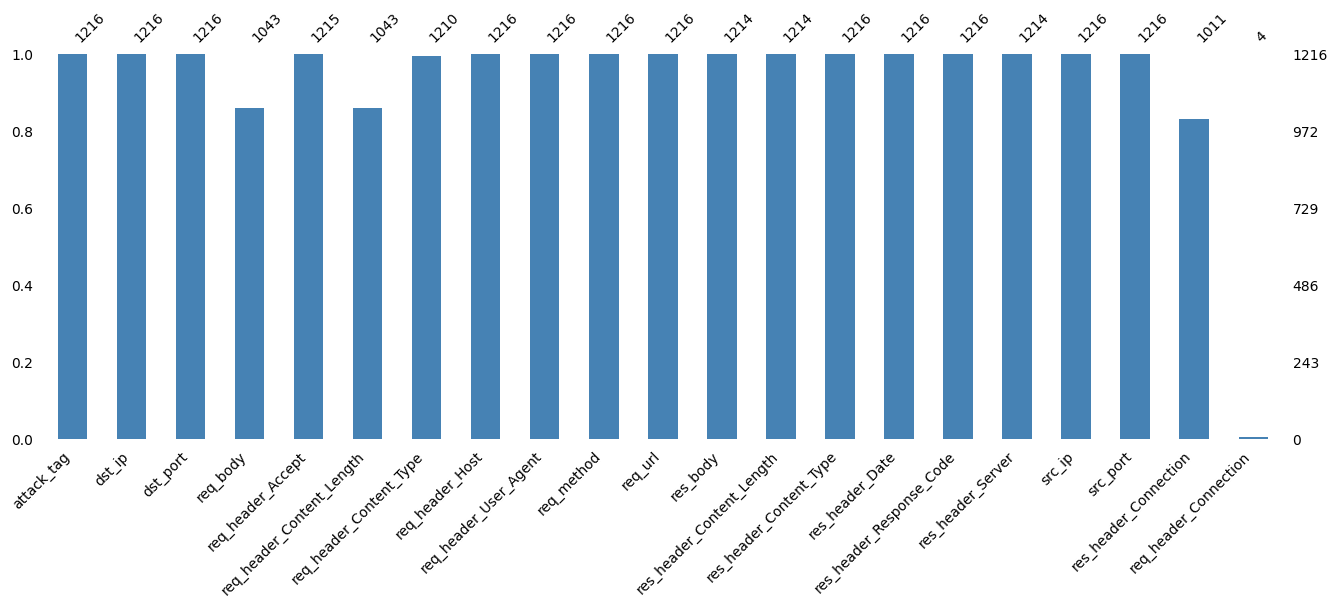

In [ ]:
# Visualize missing values using a horizontal bar chart
msno.bar(
    data_viz,
    figsize=(16, 5),
    fontsize=10,
    color='steelblue'
)

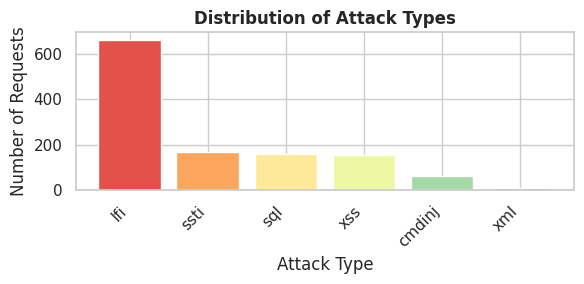

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paramètres globaux de police ---
plt.rcParams.update({
    'axes.titlesize': 26,
    'axes.labelsize': 22,
    'xtick.labelsize': 100,
    'ytick.labelsize': 100,
    'legend.fontsize': 100,
    'figure.titlesize': 100
})

# --- Style seaborn ---
sns.set_theme(style="whitegrid")

# --- Préparation des données ---
attack_only = data_viz[data_viz['attack_tag'].notna()].copy()
attack_type_counts = attack_only['attack_tag'].value_counts().reset_index()
attack_type_counts.columns = ['Attack_Type', 'Count']
n = len(attack_type_counts)
colors = sns.color_palette("Spectral", n_colors=n)

# --- Barplot ---
plt.figure(figsize=(6, 3))
plt.bar(
    attack_type_counts['Attack_Type'],
    attack_type_counts['Count'],
    color=colors,
    edgecolor='white'
)
plt.title("Distribution of Attack Types", weight='bold')
plt.xlabel("Attack Type")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


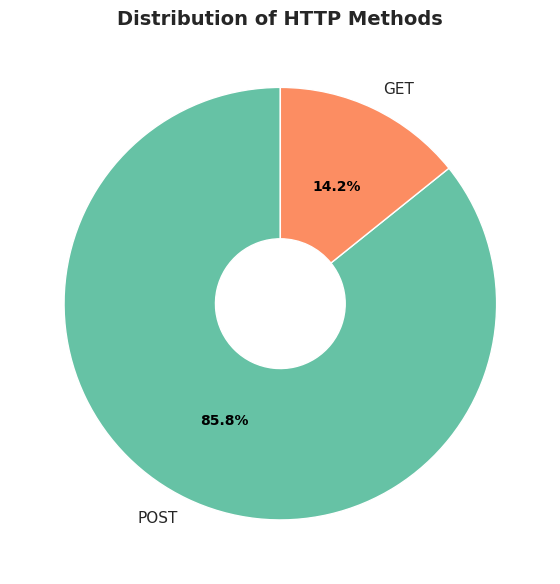

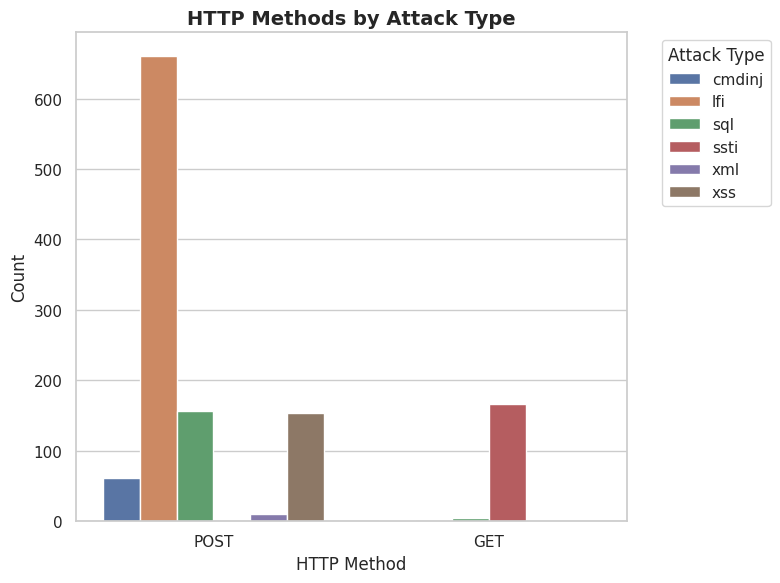

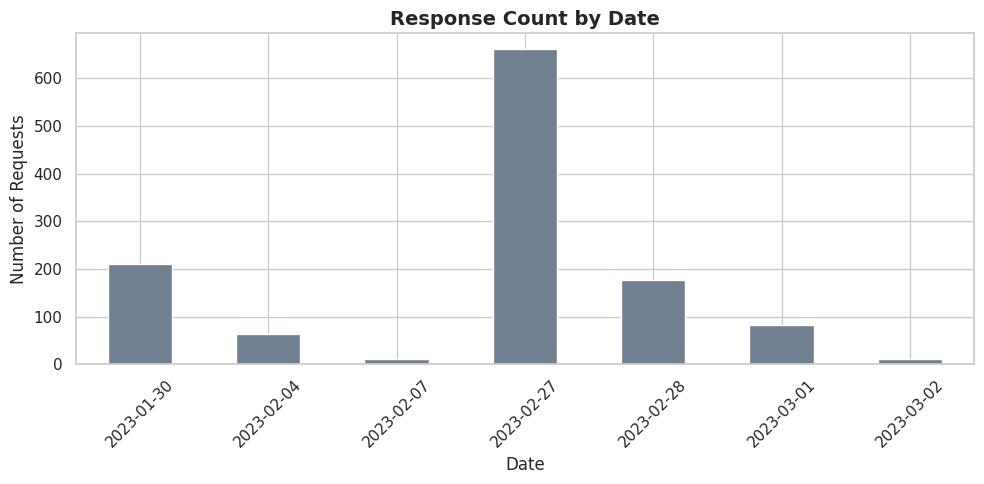

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Donut Chart of HTTP Methods ---
method_counts = data_viz['req_method'].value_counts()
colors = sns.color_palette("Set2", len(method_counts))

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    method_counts,
    labels=method_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.7, 'edgecolor': 'white'}
)
plt.setp(autotexts, size=10, weight='bold', color='black')
plt.title("Distribution of HTTP Methods", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# --- 2. HTTP Methods by Attack Type ---
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data_viz[data_viz['attack_tag'].notna()],
    x='req_method',
    hue='attack_tag'
)
plt.title("HTTP Methods by Attack Type", fontsize=14, weight='bold')
plt.xlabel("HTTP Method")
plt.ylabel("Count")
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 3. Response Count by Date ---
data_viz['res_header_Date'] = pd.to_datetime(
    data_viz['res_header_Date'],
    format='%a, %d %b %Y %H:%M:%S %Z',
    errors='coerce'
)
date_counts = data_viz['res_header_Date'].dropna().dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 5))
date_counts.plot(kind='bar', color='slategray')
plt.title("Response Count by Date", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


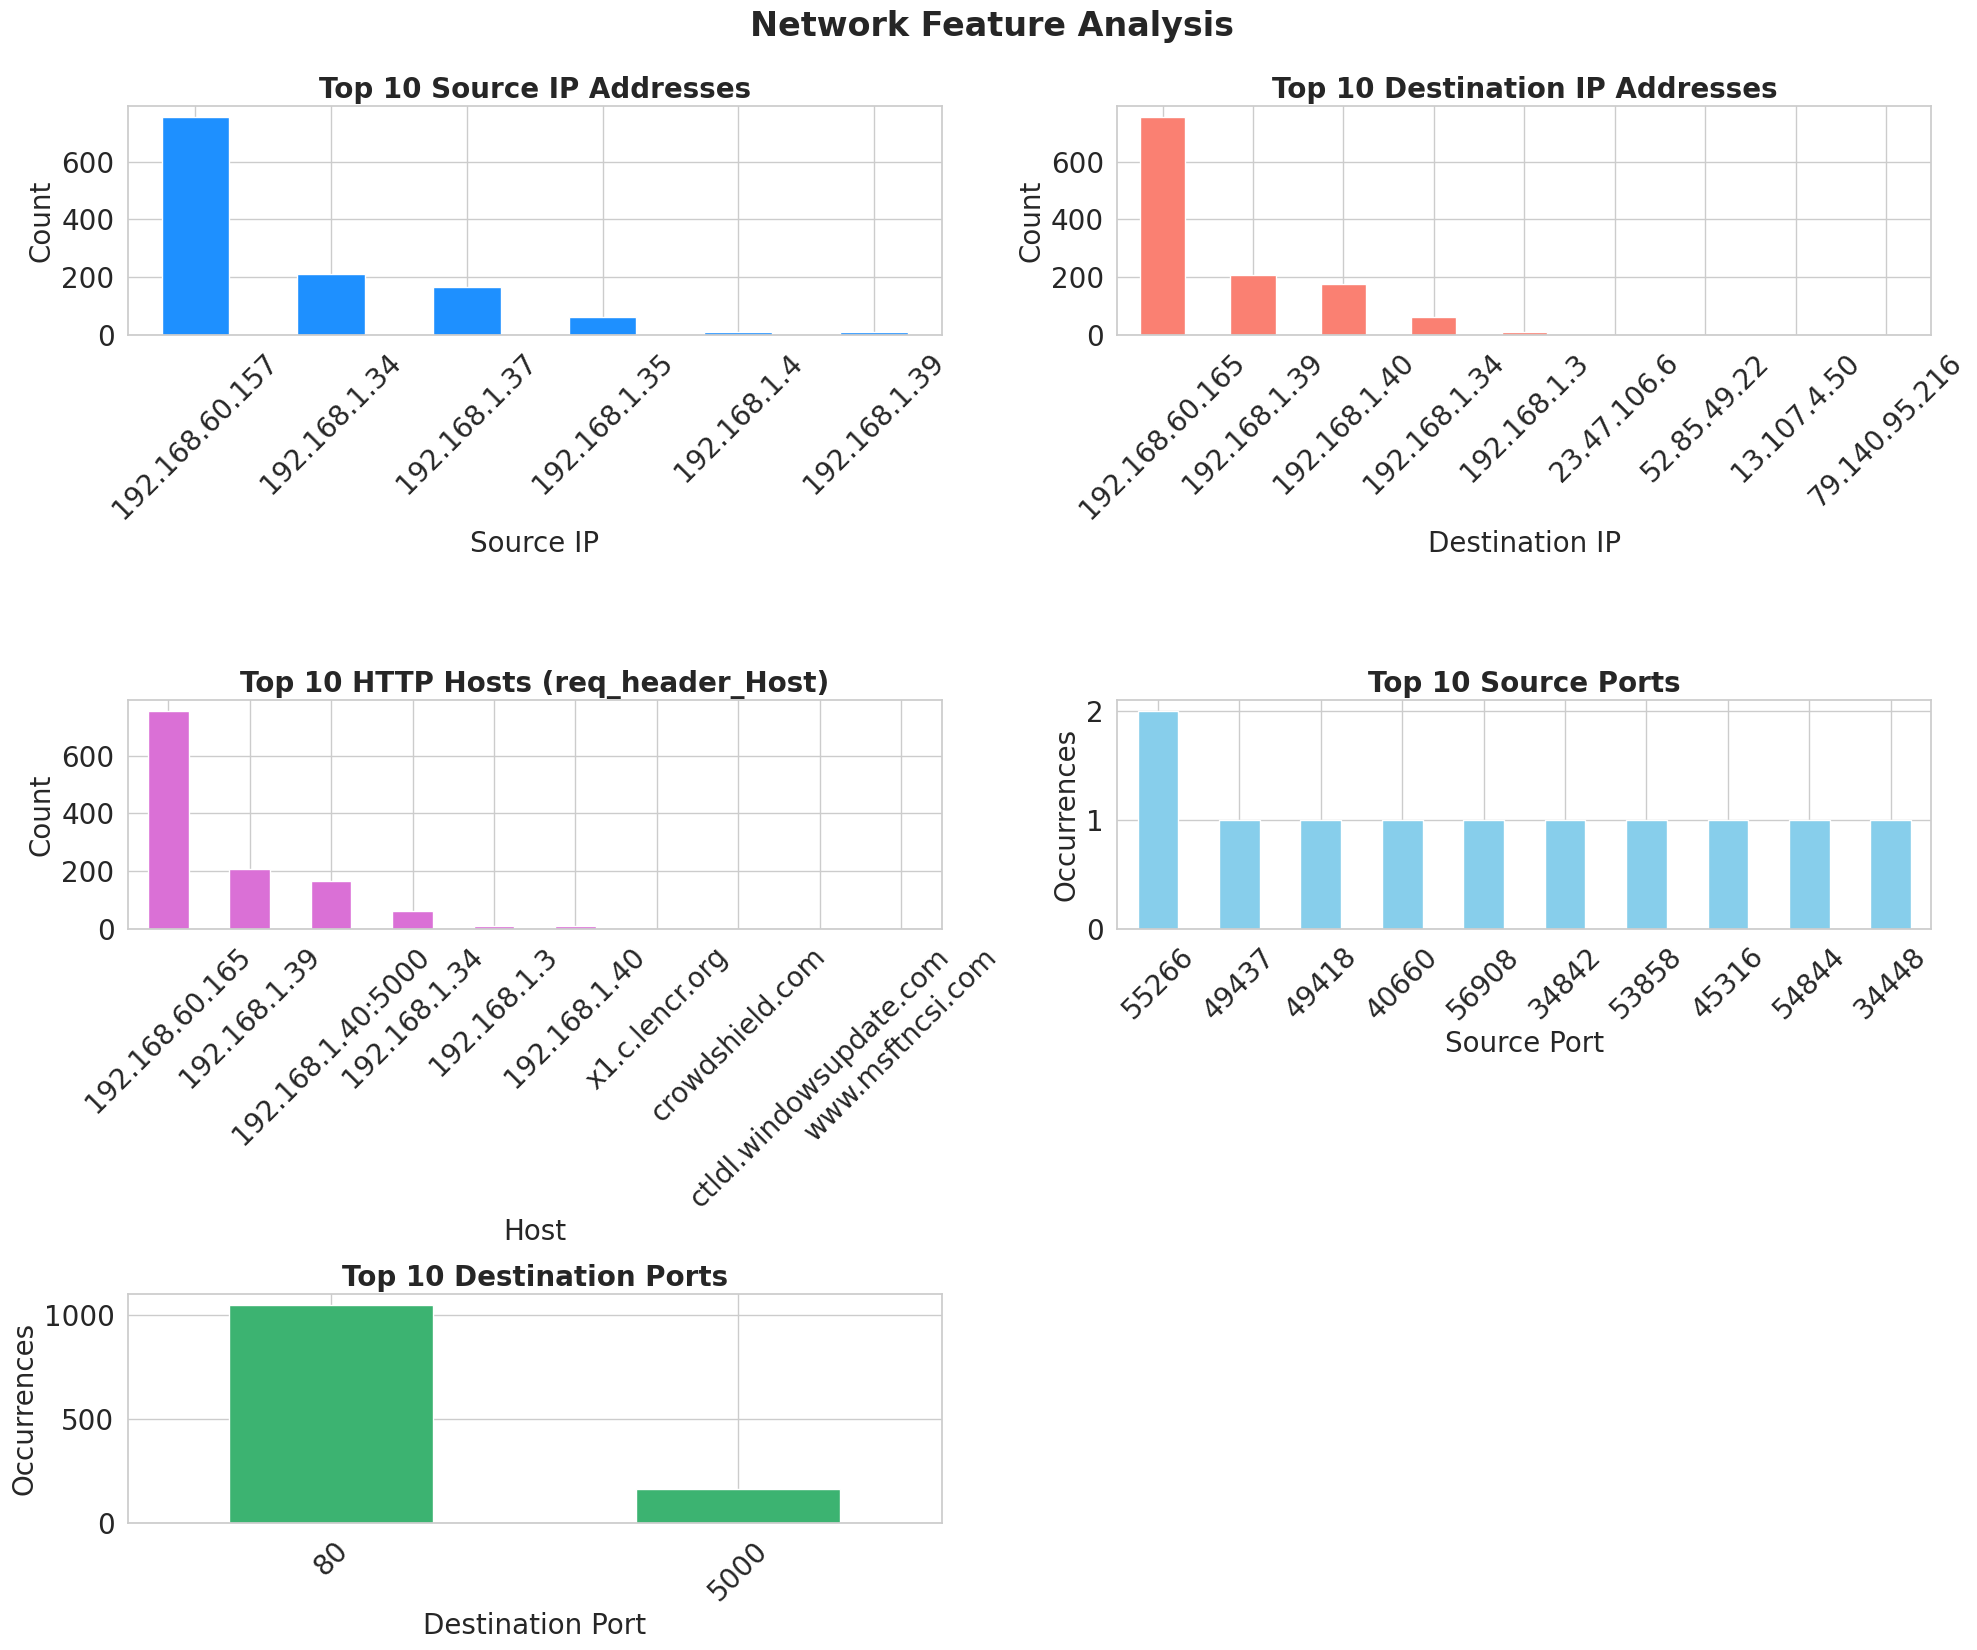

In [34]:
import matplotlib.pyplot as plt

# ---- Paramètres globaux de police ----
plt.rcParams.update({
    'axes.titlesize': 20,        # Taille des titres des subplots
    'axes.labelsize': 20,        # Taille des labels x/y
    'xtick.labelsize': 20,       # Taille des labels des ticks X
    'ytick.labelsize': 20,       # Taille des labels des ticks Y
    'legend.fontsize': 20,       # Taille de la légende si présente
    'figure.titlesize': 24       # Taille du super-titre (suptitle)
})

# ---- Grille 2 colonnes, plusieurs lignes ----
fig, axes = plt.subplots(3, 2, figsize=(20, 16))  # Taille de la figure aussi agrandie
axes = axes.flatten()

# --- 1. Top 10 Source IP Addresses ---
data_viz['src_ip'].value_counts().head(10).plot(
    kind='bar',
    color='dodgerblue',
    ax=axes[0]
)
axes[0].set_title("Top 10 Source IP Addresses", weight='bold')
axes[0].set_xlabel("Source IP")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# --- 2. Top 10 Destination IP Addresses ---
data_viz['dst_ip'].value_counts().head(10).plot(
    kind='bar',
    color='salmon',
    ax=axes[1]
)
axes[1].set_title("Top 10 Destination IP Addresses", weight='bold')
axes[1].set_xlabel("Destination IP")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# --- 3. Top 10 HTTP Hosts ---
data_viz['req_header_Host'].value_counts().head(10).plot(
    kind='bar',
    color='orchid',
    ax=axes[2]
)
axes[2].set_title("Top 10 HTTP Hosts (req_header_Host)", weight='bold')
axes[2].set_xlabel("Host")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

# --- 4. Top 10 Source Ports ---
data_viz['src_port'].value_counts().head(10).plot(
    kind='bar',
    color='skyblue',
    ax=axes[3]
)
axes[3].set_title("Top 10 Source Ports", weight='bold')
axes[3].set_xlabel("Source Port")
axes[3].set_ylabel("Occurrences")
axes[3].tick_params(axis='x', rotation=45)

# --- 5. Top 10 Destination Ports ---
data_viz['dst_port'].value_counts().head(10).plot(
    kind='bar',
    color='mediumseagreen',
    ax=axes[4]
)
axes[4].set_title("Top 10 Destination Ports", weight='bold')
axes[4].set_xlabel("Destination Port")
axes[4].set_ylabel("Occurrences")
axes[4].tick_params(axis='x', rotation=45)

# --- Désactiver le 6e subplot vide ---
fig.delaxes(axes[5])

plt.tight_layout()
plt.suptitle("Network Feature Analysis", weight='bold', y=1.03)
plt.show()


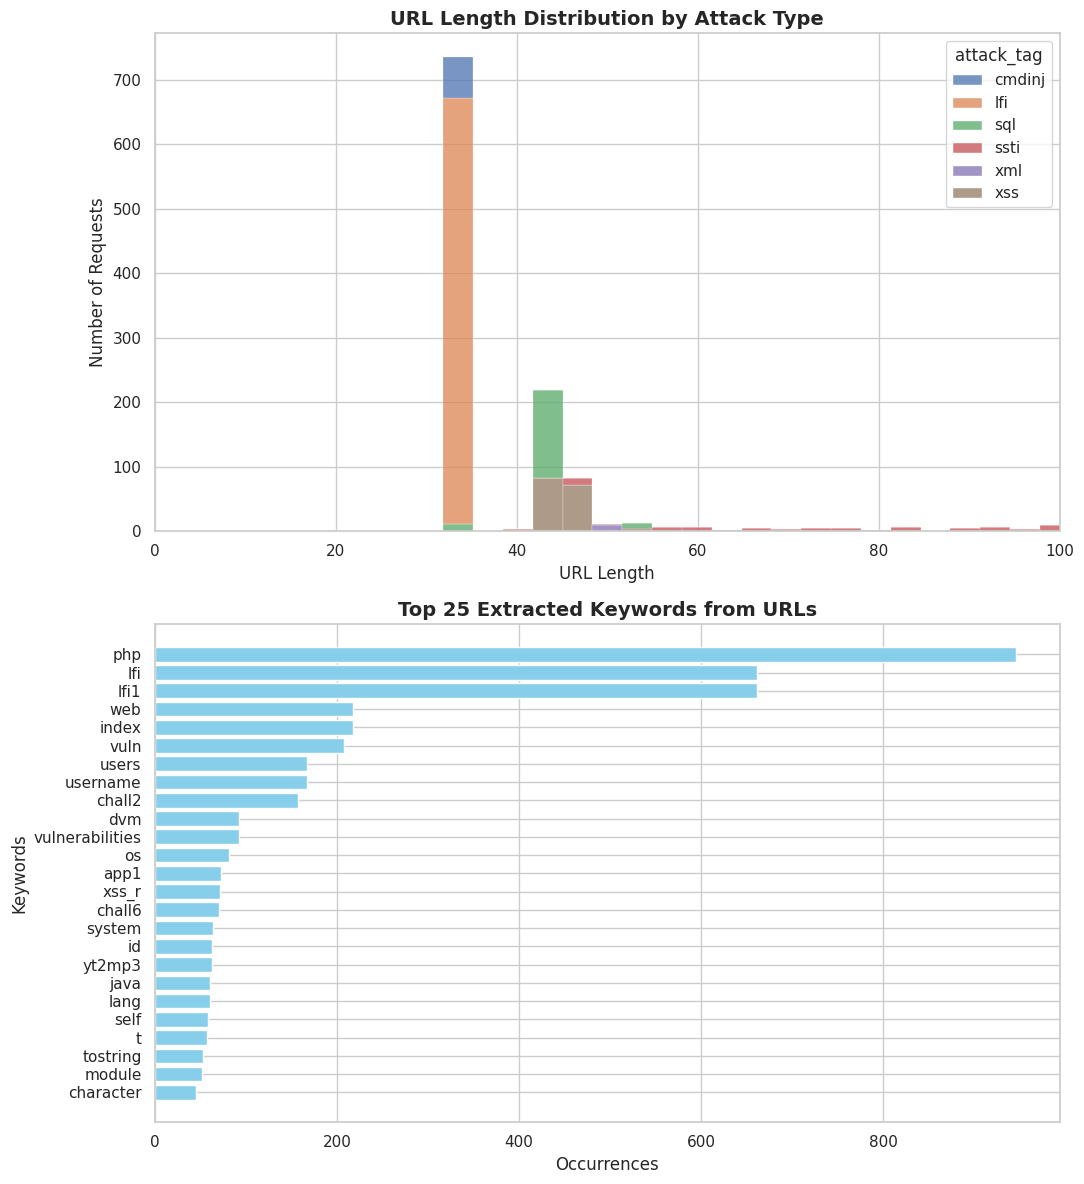

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(11, 12))

# --- 1. Histogram of URL lengths by attack type ---
sns.histplot(
    data=data_viz,
    x='url_length',
    hue='attack_tag',
    bins=300,
    multiple="stack",
    kde=False,
    common_norm=False,
    ax=axes[0]
)
axes[0].set_title("URL Length Distribution by Attack Type", fontsize=14, weight='bold')
axes[0].set_xlabel("URL Length")
axes[0].set_ylabel("Number of Requests")
axes[0].set_xlim(0, 100)

# --- 2. Top 25 keywords from URL paths and query strings ---
axes[1].barh(words[::-1], counts[::-1], color='skyblue')
axes[1].set_title("Top 25 Extracted Keywords from URLs", fontsize=14, weight='bold')
axes[1].set_xlabel("Occurrences")
axes[1].set_ylabel("Keywords")

plt.tight_layout()
plt.show()


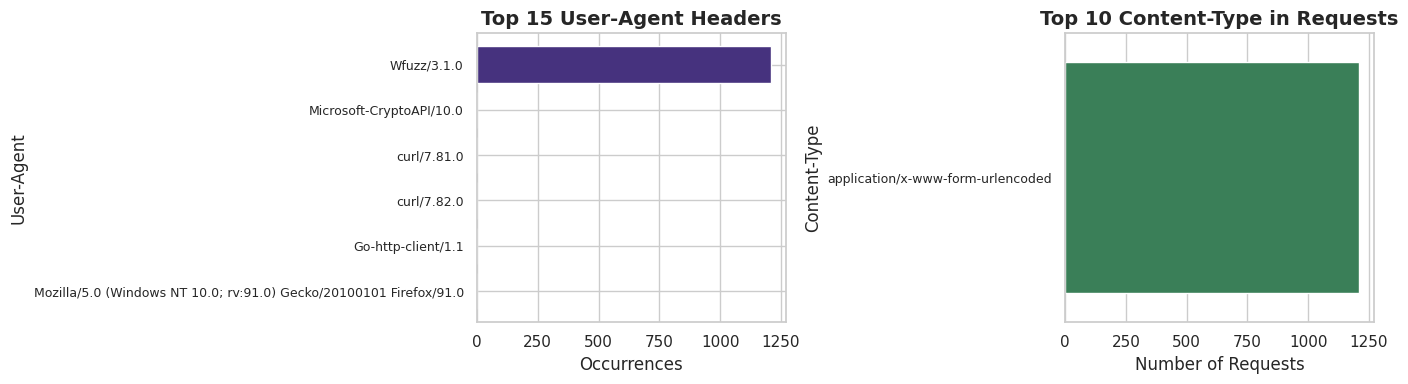

In [23]:
# Create a 1x2 subplot grid to visualize:
# - Top User-Agent headers
# - Top Content-Type values in requests
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# --- 1. Horizontal bar chart of top User-Agent headers ---
# Get the top 15 User-Agent headers and their counts
top_agents = data_viz['req_header_User_Agent'].value_counts().head(15)
top_agents_df = top_agents.reset_index()  # Convert to DataFrame
top_agents_df.columns = ['User-Agent', 'Count']  # Rename columns

# Generate a color palette for the bars
mapped_colors = sns.color_palette("viridis", len(top_agents_df))

axes[0].barh(
    top_agents_df['User-Agent'],
    top_agents_df['Count'],
    color=mapped_colors,
    edgecolor='white'
)
axes[0].invert_yaxis()  # Ensure the most frequent is on top
axes[0].set_title("Top 15 User-Agent Headers", fontsize=14, weight='bold')
axes[0].set_xlabel("Occurrences")
axes[0].set_ylabel("User-Agent")
axes[0].tick_params(axis='y', labelsize=9)

# --- 2. Horizontal bar chart of top Content-Type values ---
content_type_counts = data_viz['req_header_Content_Type'].value_counts().head(10)
content_type_df = content_type_counts.reset_index()
content_type_df.columns = ['Content-Type', 'Count']

sns.barplot(
    data=content_type_df,
    x='Count',
    y='Content-Type',
    color='seagreen',
    ax=axes[1]
)
axes[1].set_title("Top 10 Content-Type in Requests", fontsize=14, weight='bold')
axes[1].set_xlabel("Number of Requests")
axes[1].set_ylabel("Content-Type")
axes[1].tick_params(axis='y', labelsize=9)

# Final layout adjustment
plt.tight_layout()
plt.show()

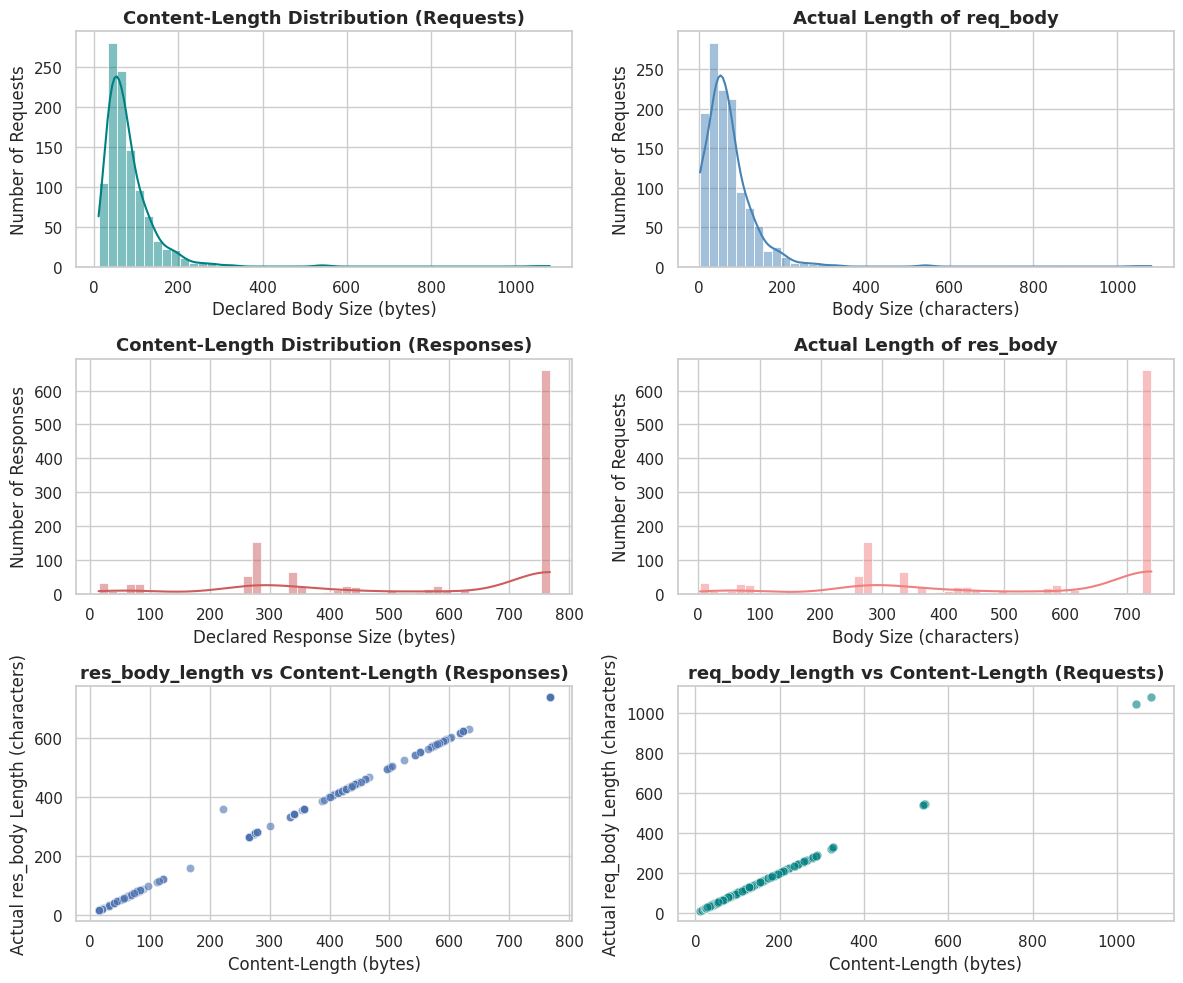

In [58]:
# --- Data preprocessing: ensure proper numeric types ---
data_viz['req_header_Content_Length'] = pd.to_numeric(data_viz['req_header_Content_Length'], errors='coerce')
data_viz['res_header_Content_Length'] = pd.to_numeric(data_viz['res_header_Content_Length'], errors='coerce')
data_viz['req_body_length'] = data_viz['req_body'].astype(str).apply(len)
data_viz['res_body_length'] = data_viz['res_body'].astype(str).apply(len)

# --- Create a 3x2 subplot grid for content length and body size analysis ---
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# --- 1. Histogram: Content-Length in requests ---
sns.histplot(
    data=data_viz['req_header_Content_Length'].dropna(),
    bins=50,
    kde=True,
    color='teal',
    ax=axes[0, 0]
)
axes[0, 0].set_title("Content-Length Distribution (Requests)", fontsize=13, weight='bold')
axes[0, 0].set_xlabel("Declared Body Size (bytes)")
axes[0, 0].set_ylabel("Number of Requests")

# --- 2. Histogram: Actual req_body length ---
sns.histplot(
    data=data_viz['req_body_length'],
    bins=50,
    kde=True,
    color='steelblue',
    ax=axes[0, 1]
)
axes[0, 1].set_title("Actual Length of req_body", fontsize=13, weight='bold')
axes[0, 1].set_xlabel("Body Size (characters)")
axes[0, 1].set_ylabel("Number of Requests")

# --- 3. Histogram: Content-Length in responses ---
sns.histplot(
    data=data_viz['res_header_Content_Length'].dropna(),
    bins=50,
    kde=True,
    color='indianred',
    ax=axes[1, 0]
)
axes[1, 0].set_title("Content-Length Distribution (Responses)", fontsize=13, weight='bold')
axes[1, 0].set_xlabel("Declared Response Size (bytes)")
axes[1, 0].set_ylabel("Number of Responses")

# --- 4. Histogram: Actual res_body length ---
sns.histplot(
    data=data_viz['res_body_length'],
    bins=50,
    kde=True,
    color='lightcoral',
    ax=axes[1, 1]
)
axes[1, 1].set_title("Actual Length of res_body", fontsize=13, weight='bold')
axes[1, 1].set_xlabel("Body Size (characters)")
axes[1, 1].set_ylabel("Number of Requests")

# --- 5. Scatterplot: Declared vs actual length in responses ---
sns.scatterplot(
    data=data_viz.dropna(subset=['res_header_Content_Length', 'res_body_length']),
    x='res_header_Content_Length',
    y='res_body_length',
    alpha=0.6,
    ax=axes[2, 0]
)
axes[2, 0].set_title("res_body_length vs Content-Length (Responses)", fontsize=13, weight='bold')
axes[2, 0].set_xlabel("Content-Length (bytes)")
axes[2, 0].set_ylabel("Actual res_body Length (characters)")

# --- 6. Scatterplot: Declared vs actual length in requests ---
sns.scatterplot(
    data=data_viz.dropna(subset=['req_header_Content_Length', 'req_body_length']),
    x='req_header_Content_Length',
    y='req_body_length',
    alpha=0.6,
    color='teal',
    edgecolor='white',
    s=40,
    ax=axes[2, 1]
)
axes[2, 1].set_title("req_body_length vs Content-Length (Requests)", fontsize=13, weight='bold')
axes[2, 1].set_xlabel("Content-Length (bytes)")
axes[2, 1].set_ylabel("Actual req_body Length (characters)")

# --- Adjust layout and render the plot ---
plt.tight_layout()
plt.show()

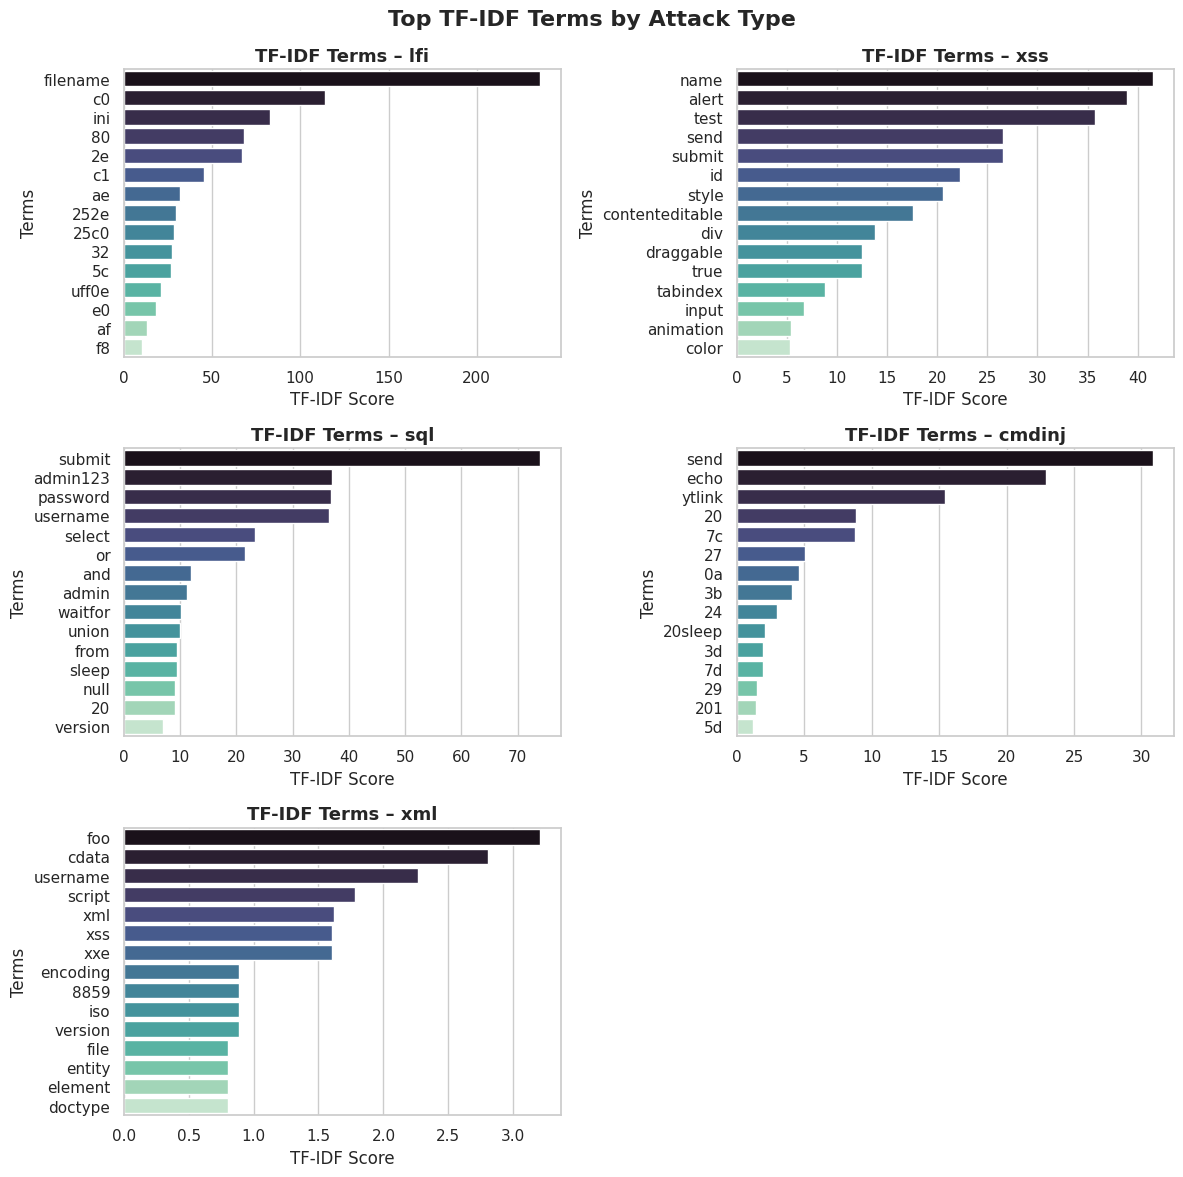

In [ ]:
# --- Filter attack types that contain non-empty req_body entries ---
tags = [
    tag for tag in data_viz['attack_tag'].dropna().unique()
    if not data_viz[data_viz['attack_tag'] == tag]['req_body'].dropna().empty
]

n_tags = len(tags)
n_cols = 2
n_rows = math.ceil(n_tags / n_cols)

# --- Create subplot grid ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), sharey=False)
axes = axes.flatten()

# --- Generate TF-IDF barplots per attack type ---
for i, tag in enumerate(tags):
    texts = data_viz[data_viz['attack_tag'] == tag]['req_body'].dropna().astype(str)

    vectorizer = TfidfVectorizer(max_features=15)
    tfidf_matrix = vectorizer.fit_transform(texts)
    terms = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1

    tfidf_df = pd.DataFrame({
        'term': terms,
        'score': scores
    }).sort_values(by='score', ascending=False)

    sns.barplot(
        data=tfidf_df,
        x='score',
        y='term',
        hue='term',
        legend=False,
        palette='mako',
        ax=axes[i]
    )
    axes[i].set_title(f"TF-IDF Terms – {tag}", fontsize=13, weight='bold')
    axes[i].set_xlabel("TF-IDF Score")
    axes[i].set_ylabel("Terms")

# --- Remove any unused subplots ---
for j in range(len(tags), len(axes)):
    axes[j].remove()

# --- Final layout adjustments ---
plt.suptitle("Top TF-IDF Terms by Attack Type", fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

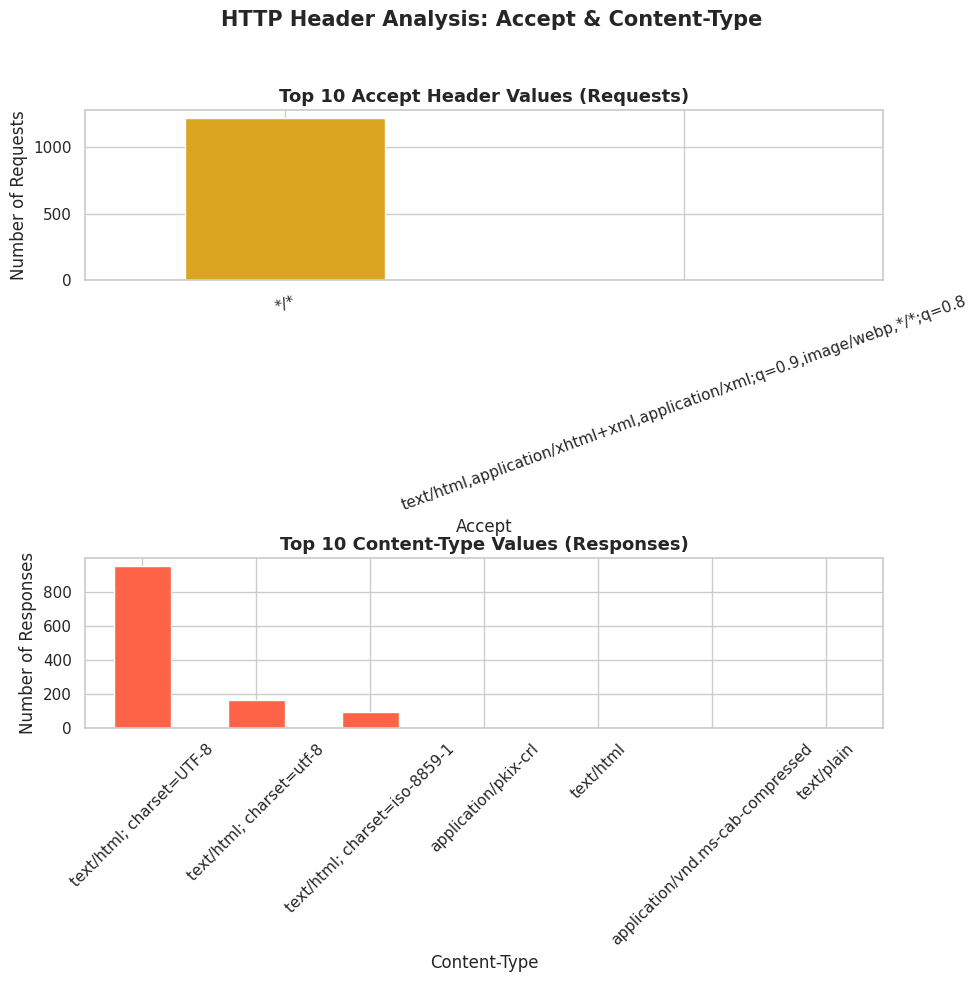

In [57]:
# --- Create a 2-row subplot grid for HTTP header analysis ---
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# --- 1. Top 10 Accept header values in requests ---
data_viz['req_header_Accept'].value_counts().head(10).plot(
    kind='bar',
    color='goldenrod',
    ax=axes[0]
)
axes[0].set_title("Top 10 Accept Header Values (Requests)", fontsize=13, weight='bold')
axes[0].set_xlabel("Accept")
axes[0].set_ylabel("Number of Requests")
axes[0].tick_params(axis='x', rotation=20)

# --- 2. Top 10 Content-Type values in responses ---
data_viz['res_header_Content_Type'].value_counts().head(10).plot(
    kind='bar',
    color='tomato',
    ax=axes[1]
)
axes[1].set_title("Top 10 Content-Type Values (Responses)", fontsize=13, weight='bold')
axes[1].set_xlabel("Content-Type")
axes[1].set_ylabel("Number of Responses")
axes[1].tick_params(axis='x', rotation=45)

# --- Final layout adjustments ---
plt.suptitle("HTTP Header Analysis: Accept & Content-Type", fontsize=15, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()